# Laboratorio: Criptografia - Generadores pseudoaleatorios y seguridad EAV

## Objetivo:
El objetivo de este lab es ganar un poco de experiencia implementando los conceptos estudiados en clase, como PRGs y seguridad EAV

## Instrucciones para la tarea
Entregar por GradeScope un archivo solution.py con las funciones implementadas. El autograder evaluará todo menos las preguntas asociadas a los tests estadísticos.
Junto con el archivo solution.py, subir un txt o PDF con el código implementando los tests estadísticos adicionales (2), junto con los resultados obtenidos para cada PRG y la interpretación de los resultados comparándolos entre sí.

## Parte 1: Implementando y comparando PRGs

### Implementar el PRG
Ejercicio: Piensa o investiga 3 formas de conseguir un seed para usar con un PRG en código.

Ejercicio: Implementar la función pseudo_random_generator que recibe un seed y una longitud para expansión. La función será de la siguiente manera. G(i) = (a * G(i-1) + c) % m, donde a, c y m son valores predefinidos. G(i) devuelve un número en base 10 de 32 bits (m es 2^32). Lo que queremos es generar una cantidad de bits en base a la longitud, así que podemos coger los bits generados y truncarlos.

In [16]:


def pseudo_random_generator(seed, length):
    a = 1664525
    c = 1013904223
    m = 2**32
    sequence = ''
    value = seed
    while(len(sequence) < length):
        value = (a * value + c) % m
        #print(value)
        #print(bin(value))
        sequence += bin(value)[2:] + ''

    _ = sequence[:length]
    #print(sequence)
    #print(_)
    return _

pseudo_random_generator(1213, 10)

'1011010011'

### Mersenne Twister PRG

El Mersenne Twister es un PRG muy famoso y utilizado en python para generar valores aleatorios. Puedes usarlo como punto de comparación con tu PRG para las siguientes secciones.

In [7]:
import random

def mersenne_twister_generator(seed, length):
    random.seed(seed)
    mt_sequence = [random.getrandbits(1) for _ in range(length)]
    return mt_sequence


mersenne_twister_generator(1213, 10)

[1, 1, 0, 1, 0, 0, 1, 1, 0, 0]

### Tests de aleatoridad estadistica
Considera las siguientes funciones, que son dos tests simples para medir la aleatoridad de una secuencia. El primero cuenta cuantos 1s y 0s hay. En un string aleatorio esperamos más o menos la misma cantidad de 1s y 0s. 
El segundo cuenta la cantidad de subsecuencias consecutivas. Esperamos que hayan varias subsecuencias consecutivas, ya que no queremos largas partes del string siendo iguales.

Ejercicio: Investiga e implementa dos tests estadísticos más aparte de estos.

In [19]:
from collections import Counter

def frequency_test(sequence):
    count = Counter(sequence)
    return count

def runs_test(sequence):
    runs = 1
    for i in range(1, len(sequence)):
        if sequence[i] != sequence[i-1]:
            runs += 1
    return runs


''' Autocorrelación
Este test mide si los bits de la secuencia están correlacionados con versiones desplazadas de sí mismos.
En una secuencia aleatoria, la correlación con su versión desplazada debería ser cercana a 0.
'''

def autocorrelation_test(sequence, lag=1):
    n = len(sequence)
    # Convertir caracteres '0' y '1' a enteros
    seq = [int(bit) for bit in sequence]
    matches = 0
    for i in range(n - lag):
        if seq[i] == seq[i + lag]:
            matches += 1
    return matches / (n - lag)  # proporción de coincidencias

''' Longitud de corridas
Este test analiza la distribución de longitudes de corridas de 0s y 1s.
En un string aleatorio no deberían existir demasiadas corridas muy largas.
'''
def runs_length_test(sequence):
    runs_lengths = []
    current_run = 1
    for i in range(1, len(sequence)):
        if sequence[i] == sequence[i-1]:
            current_run += 1
        else:
            runs_lengths.append(current_run)
            current_run = 1
    runs_lengths.append(current_run)  # añadir la última corrida
    
    from collections import Counter
    return Counter(runs_lengths)  # frecuencia de longitudes de corridas



### Comparación
Ahora vamos a comparar nuestros PRGs de acuerdo a los tests.
Ejercicio: Corre el código dado y agrega tus propios tests. Investiga dos tests más que sean relevantes para la evaluación de un PRG. Presenta los valores obtenidos y explica cómo se comparan entre los dos PRGs. Compara e interpreta los valores para decidir qué PRG es mejor.

In [20]:
seed = 7456712631829312301294385921412412
length = 1000

lcg_sequence = pseudo_random_generator(seed, length)
mt_sequence = mersenne_twister_generator(seed, length)

# Frequency Test
print("Frequency Test:")
print("LCG:", frequency_test(lcg_sequence))
print("Mersenne Twister:", frequency_test(mt_sequence))

# Runs Test
print("\nRuns Test:")
print("LCG:", runs_test(lcg_sequence))
print("Mersenne Twister:", runs_test(mt_sequence))

# Autocorrelation Test
print("\nAutocorrelation Test (lag=1):")
print("LCG:", autocorrelation_test(lcg_sequence))
print("Mersenne Twister:", autocorrelation_test(mt_sequence))

# Runs Length Test
print("\nRuns Length Test:")
print("LCG:", runs_length_test(lcg_sequence).most_common(5))  # top 5 longitudes
print("Mersenne Twister:", runs_length_test(mt_sequence).most_common(5))

Frequency Test:
LCG: Counter({'1': 515, '0': 485})
Mersenne Twister: Counter({0: 502, 1: 498})

Runs Test:
LCG: 527
Mersenne Twister: 501

Autocorrelation Test (lag=1):
LCG: 0.47347347347347346
Mersenne Twister: 0.4994994994994995

Runs Length Test:
LCG: [(1, 274), (2, 147), (3, 48), (4, 28), (5, 13)]
Mersenne Twister: [(1, 253), (2, 131), (3, 56), (4, 27), (5, 16)]


### Visualización
También podemos ver las secuencias generadas visualmente. Interpreta y comenta sobre los gráficos y las comparaciones entre ellos.

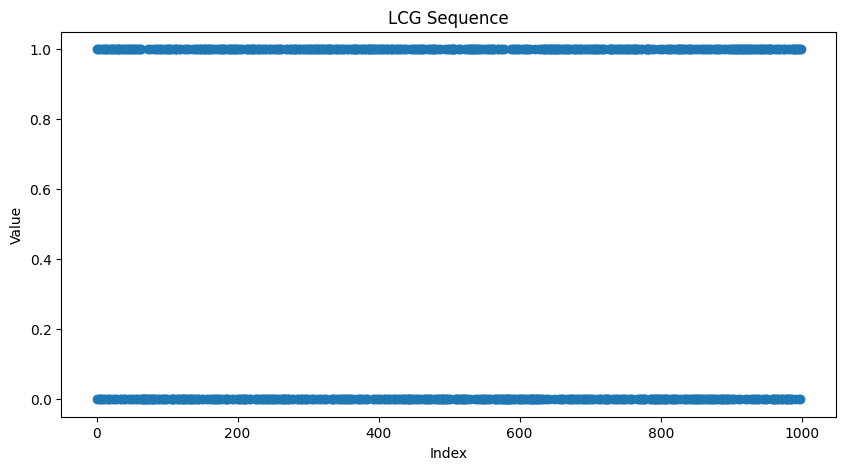

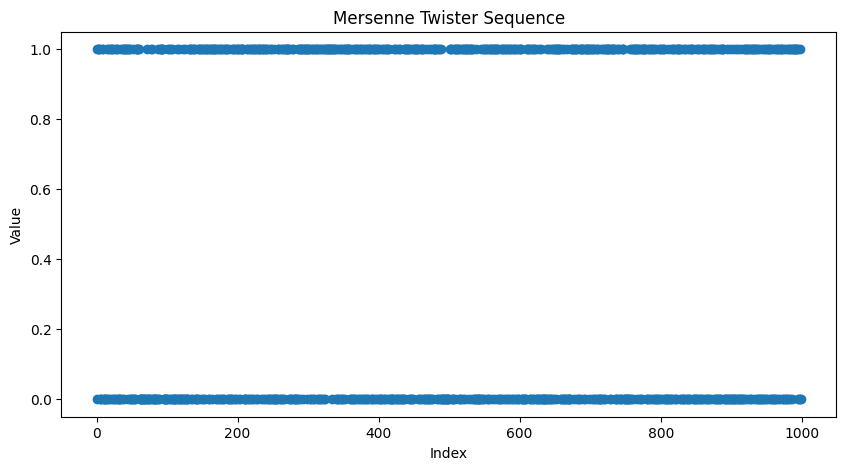

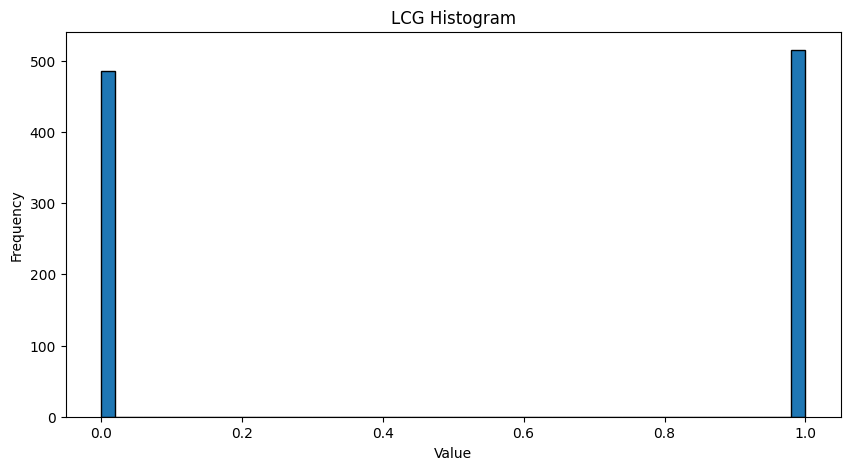

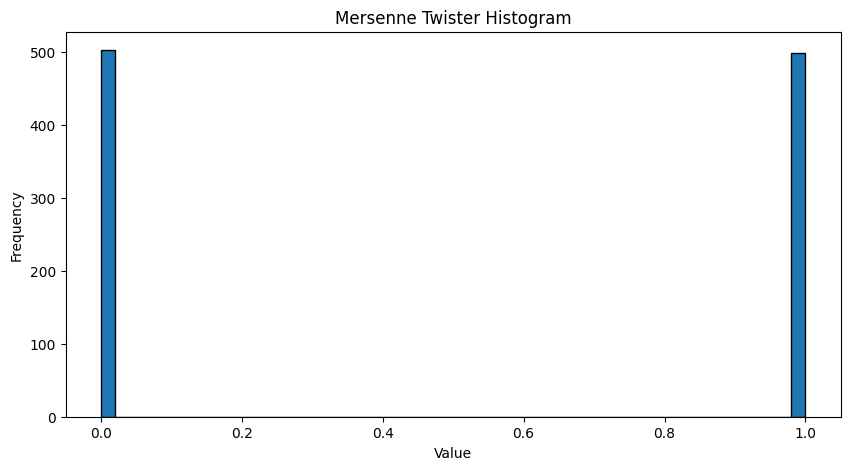

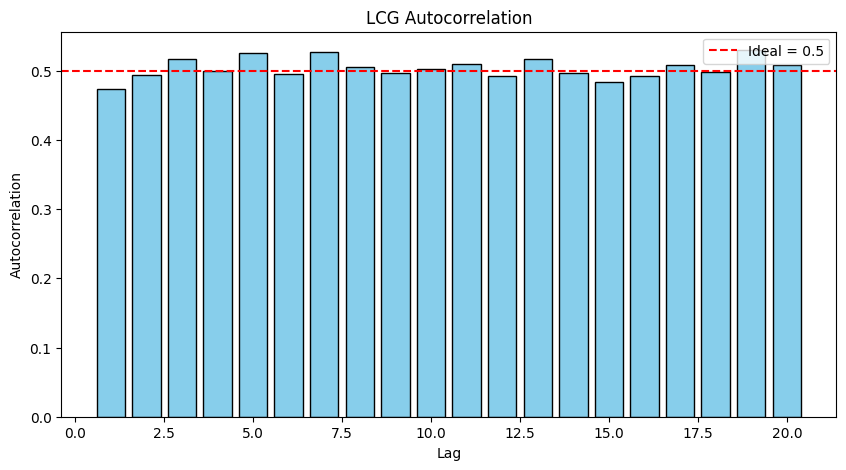

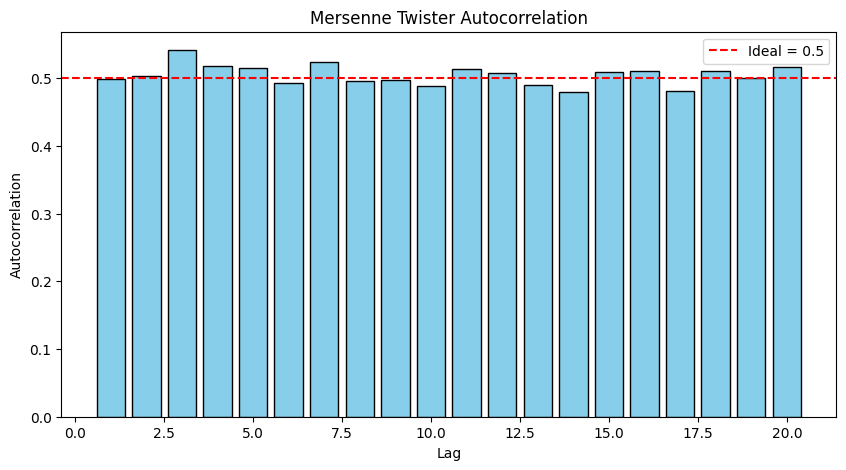

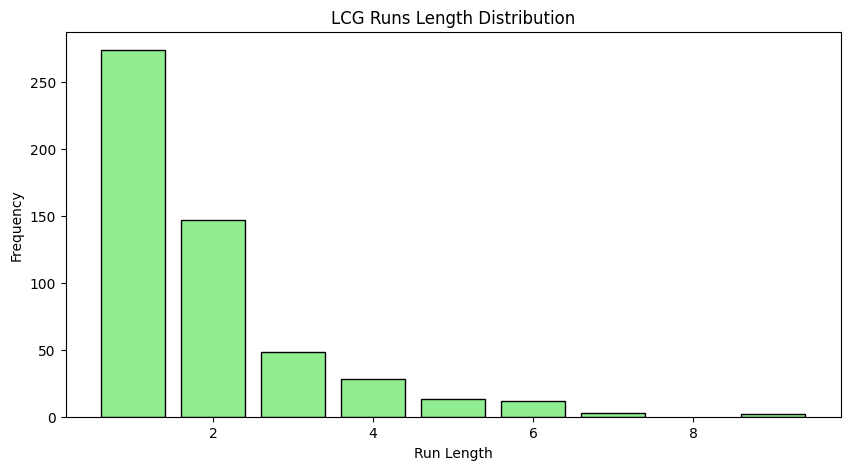

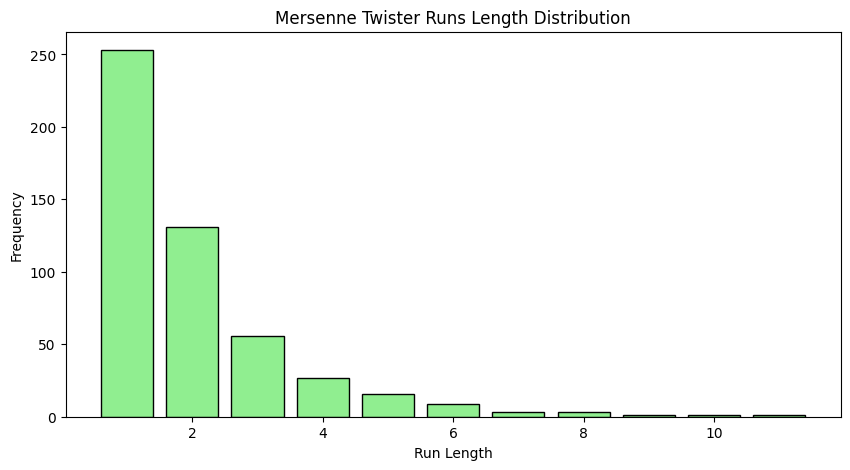

In [22]:
import matplotlib.pyplot as plt

def plot_sequence(sequence, title):
    seq = [int(bit) for bit in sequence]  # convertir string -> lista de enteros

    plt.figure(figsize=(10, 5))
    plt.plot(seq, marker='o', linestyle='none')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.show()

def plot_histogram(sequence, title):
    seq = [int(bit) for bit in sequence]  # convertir string -> lista de enteros

    plt.figure(figsize=(10, 5))
    plt.hist(seq, bins=50, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
def plot_autocorrelation(sequence, max_lag=20, title="Autocorrelation"):
    """Grafica la autocorrelacion para distintos lags"""
    values = []
    for lag in range(1, max_lag+1):
        values.append(autocorrelation_test(sequence, lag))

    plt.figure(figsize=(10, 5))
    plt.bar(range(1, max_lag+1), values, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.axhline(0.5, color='red', linestyle='--', label='Ideal = 0.5')
    plt.legend()
    plt.show()

def plot_runs_length(sequence, title="Runs Length Distribution"):
    """Grafica la distribucion de longitudes de corridas"""
    runs_counter = runs_length_test(sequence)

    lengths = list(runs_counter.keys())
    counts = list(runs_counter.values())

    plt.figure(figsize=(10, 5))
    plt.bar(lengths, counts, color='lightgreen', edgecolor='black')
    plt.title(title)
    plt.xlabel('Run Length')
    plt.ylabel('Frequency')
    plt.show()


# Plot sequences
plot_sequence(lcg_sequence, 'LCG Sequence')
plot_sequence(mt_sequence, 'Mersenne Twister Sequence')

# Plot histograms
plot_histogram(lcg_sequence, 'LCG Histogram')
plot_histogram(mt_sequence, 'Mersenne Twister Histogram')

# Autocorrelation plots
plot_autocorrelation(lcg_sequence, max_lag=20, title="LCG Autocorrelation")
plot_autocorrelation(mt_sequence, max_lag=20, title="Mersenne Twister Autocorrelation")

# Runs Length plots
plot_runs_length(lcg_sequence, title="LCG Runs Length Distribution")
plot_runs_length(mt_sequence, title="Mersenne Twister Runs Length Distribution")

## Parte 2: Usando y atacando PRGs

Ejercicio: Implementa el Pseudo OTP. Puedes probarlo usando nuestro propio PRG o el mersenne twister.

In [24]:
def Gen(G, seed, n):
	return G(seed, n)


def Enc(k, m):
	    # Convertir texto a bits
    m_bits = ""
    for c in m:
        ascii_val = ord(c)
        bin_str = format(ascii_val, "08b")  # 8 bits por caracter
        m_bits += bin_str

    # XOR con la clave
    ct = ""
    for i in range(len(m_bits)):
        bit = str(int(m_bits[i]) ^ int(k[i]))
        ct += bit

    return ct

def Dec(k, c):
	 # XOR con la clave
    m_bits = ""
    for i in range(len(c)):
        bit = str(int(c[i]) ^ int(k[i]))
        m_bits += bit

    # Convertir de bits a texto
    m = ""
    for i in range(0, len(m_bits), 8):
        byte = m_bits[i:i+8]
        char = chr(int(byte, 2))
        m += char

    return m

m = "we love going to our favorite restaurant to eat our favorite food"

k = Gen(pseudo_random_generator, 1213, len(m)*8)

ct = Enc(k, m)

print("Ciphertext (primeros 32 bits):", ct[:32], "...")

pt = Dec(k, ct)

print("Plaintext:", pt)


Ciphertext (primeros 32 bits): 11000011101000100101111010010100 ...
Plaintext: we love going to our favorite restaurant to eat our favorite food


Ejercicio: Implementa un distinguidor D que permita demostrar que los siguiente G no son un PRG: 

a. G(x) = x || OR(x1,...xn)

b. G(x) = x || XOR(x1,...xn)

c. G(x) = x || x

In [9]:
def D1(y):
    return _

def D2(y):
    return _

def D3(y):
    return _

Implementa la función A que simule el adversario del experimento de seguridad EAV, e identifica correctamente el mensaje encriptado a partir de C, que usa un pseudo one time pad como esquema de encriptación, con G(x) = x || OR(x1,...xn) como generador pseudoaleatorio.

In [10]:
def A_messages(n):
    m0 = _
    m1 = _
    return (m0, m1)

def A_attack(m0, m1, c):
    return _

## Parte 3: Seguridad contra múltiples mensajes

Ejercicio: Implementa la función A que simule el adversario del experimento de seguridad contra múltiples mensajes, e identifica correctamente el mensaje encriptado a partir de C, que usa un one time pad como esquema de encriptación.

In [11]:
def A_messages_multiple(c):
    vector1, vector2 = _, _
    return (vector1, vector2)

def A_attack_multiple(m0, m1, c):
    return _